In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [32]:
df1=pd.DataFrame(pd.read_csv("./files/income.csv"))
df2=pd.DataFrame(pd.read_csv("./files/student_scores.csv"))

In [11]:
df1.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


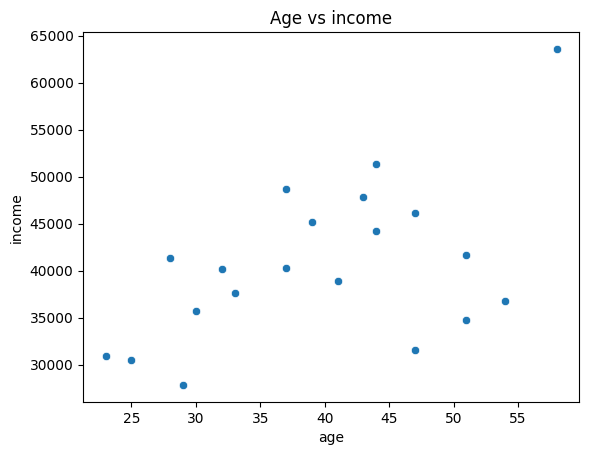

In [14]:
sns.scatterplot(x=df1["age"],y=df1["income"])
plt.title("Age vs income")
plt.show()

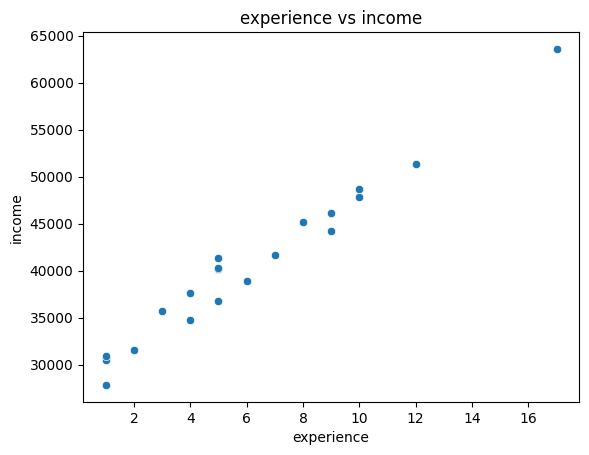

In [16]:
sns.scatterplot(x=df1["experience"],y=df1["income"])
plt.title("experience vs income")
plt.show()

**Linear regression on df2 on students scores and hours**


In [45]:
df2.sample(5)

,Hours,Scores
23,6.9,76
6,9.2,88
7,5.5,60
4,3.5,30
17,1.9,24


In [33]:
from sklearn.model_selection import train_test_split
x=df2["Hours"].values
y=df2["Scores"].values
x=x.reshape(-1,1)
y=y.reshape(-1,1)

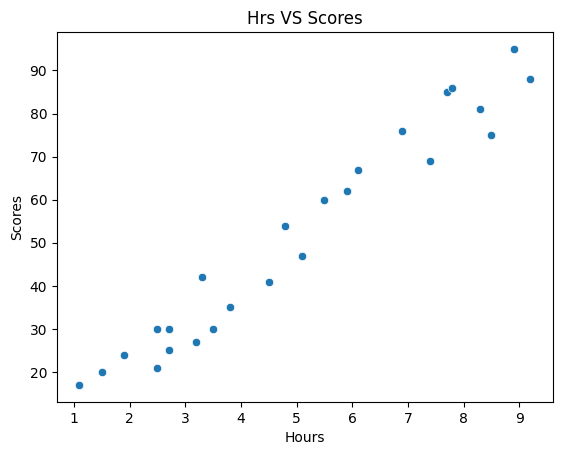

In [46]:
sns.scatterplot(x=df2["Hours"],y=df2["Scores"])
plt.title("Hrs VS Scores")
plt.show()

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [35]:
x_train.shape,x_test.shape

((20, 1), (5, 1))

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm=LinearRegression()

In [38]:
lm.fit(x_train,y_train)

LinearRegression()

In [39]:
y_pred=lm.predict(x_test)

In [40]:
a=lm.coef_
b=lm.intercept_
a,b

(array([[9.68207815]]), array([2.82689235]))

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [49]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
rscore=r2_score(y_test,y_pred)
print("MSE: {:.4f}".format(mse))
print("RMSE: {:.4f}".format(rmse))
print("RSCORE: {:.4f}".format(rscore))

MSE: 18.9432
RMSE: 4.3524
RSCORE: 0.9678


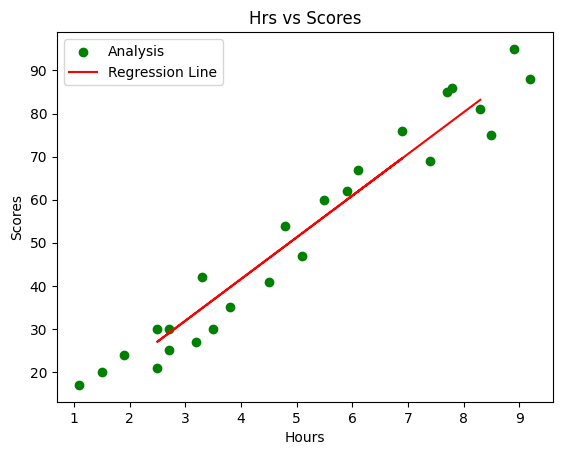

In [47]:
plt.scatter(x,y,label='Analysis',color="green")
plt.plot(x_test,y_pred,color='r',label='Regression Line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.title('Hrs vs Scores')
plt.show()

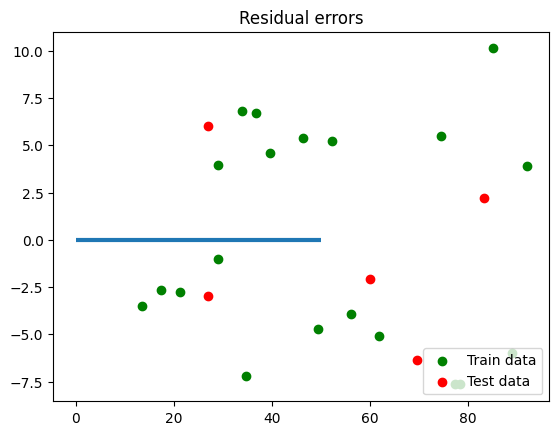

In [48]:
plt.scatter(lm.predict(x_train),lm.predict(x_train)-y_train,label="Train data",color="green")
plt.scatter(lm.predict(x_test),lm.predict(x_test)-y_test,label="Test data",color="red")
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title("Residual errors")
plt.legend(loc = 4)
plt.show()

In [50]:
y_pred1=lm.predict(x_train)
print("r2_score value: {:.4f}".format(r2_score(y_train,y_pred1)))

r2_score value: 0.9491


In [51]:
print("Training score : {:.4f}".format(lm.score(x_train,y_train)))
print("Test score : {:.4f}".format(lm.score(x_test,y_test)))

Training score : 0.9491
Test score : 0.9678


**Linear Regression on multiple columns , performed on df1**

In [55]:
x1=df1[["age","experience"]].values
y1=df1["income"].values
y1=y1.reshape(-1,1)

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2, random_state=42)

In [57]:
x_train.shape,x_test.shape

((16, 2), (4, 2))

In [58]:
lm2=LinearRegression()
lm2.fit(x_train,y_train)

LinearRegression()

In [61]:
y_pred=lm2.predict(x_test)
y_pred.reshape(len(y_pred),1)

array([[31093.38107376],
       [31295.49954076],
       [40250.46080162],
       [34897.6958918 ]])

In [62]:
a1=lm2.coef_
b1=lm2.intercept_
a1,b1

(array([[-101.0592335 , 2154.80549277]]), array([31465.0564185]))

In [63]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
rscore=r2_score(y_test,y_pred)
print("MSE: {:.4f}".format(mse))
print("RMSE: {:.4f}".format(rmse))
print("RSCORE: {:.4f}".format(rscore))

MSE: 753796.7694
RMSE: 868.2147
RSCORE: 0.9387


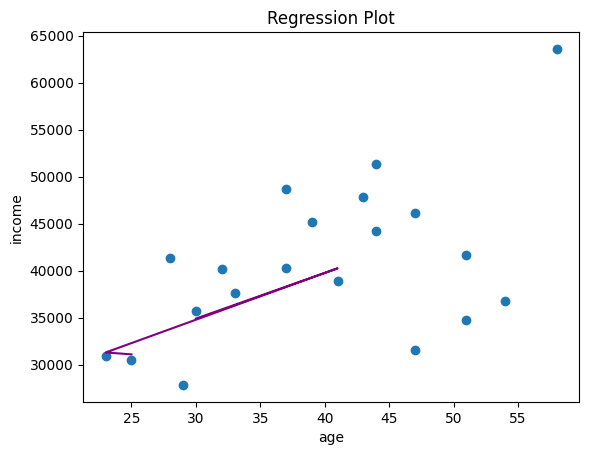

In [64]:
plt.scatter(data=df1,x='age',y='income')
plt.plot(x_test[:,0],y_pred,color="purple")
plt.xlabel('age')
plt.ylabel('income')
plt.title('Regression Plot')
plt.show()

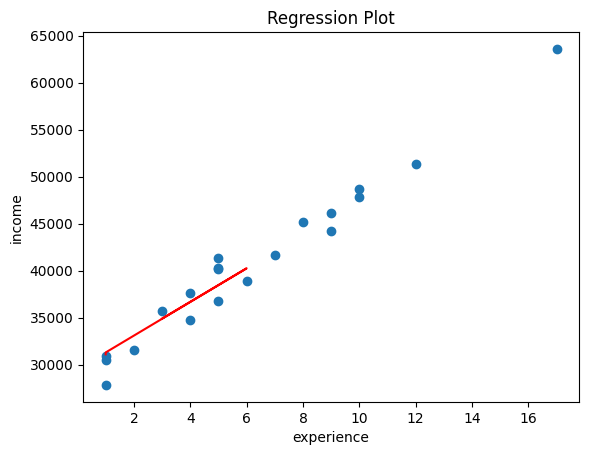

In [67]:
plt.scatter(data=df1,x='experience',y='income')
plt.plot(x_test[:,1],y_pred,color="red")
plt.xlabel('experience')
plt.ylabel('income')
plt.title('Regression Plot')
plt.show()

In [69]:
y_pred1=lm2.predict(x_train)
print("r2_score value: {:.4f}".format(r2_score(y_train,y_pred1)))

r2_score value: 0.9741


In [71]:
print("Training score : {:.4f}".format(lm2.score(x_train,y_train)))
print("Test score : {:.4f}".format(lm2.score(x_test,y_test)))

Training score : 0.9741
Test score : 0.9387
